# Trajectory Inference (Language: R)

Trajectory Inference is an analysis type that takes the idea that we can use data collected from single cell sequencing experiments and computationally infer the order in which these cells would appear along developmental or gene expression trajectories.

**What is pseudotime analysis?**</br>
Pseudotime analysis (also called pseudotime inference or trajectory inference) aims to infer the ordering of cells along a lineage based on gene expression profiles measured by scRNA-seq. Pseudotime is a time-like variable, which indicates the relative position a cell takes in a lineage (in other words, pseudotime is the distance between a cell and the start of the trajectory, measured along the shortest path).  

Remember, your typical scRNA-seq dataset is a static snaphot, i.e. the cells were collected at one single timepoint. However, in your scRNA-seq dataset there are cells that are representative of different stages of differentiation and development. Therefore, by establishing a temporal dimension in a scRNA-seq dataset, we can look at the expression dynamics of individual genes along with continuous cell-state changes, and measure how much progress an individual cell has made through a process such as cell differentiaion.

There are many methods used to perform pseudotime and trajectory inference. Check out [*dynverse*](https://dynverse.org/), a collection of R packages aimed at supporting the trajectory inference community, which offers a catalog of various methods as well as comparisons between the various methods so you can pick the right tool for your dataset. 

## Pseudotime Analysis
Pseudotime is an abstract unit of a cells progress. This unit is represented by a distance between a cell and the start of the trajectory measured along its shortest path.  
The total length is defined in terms of the enitre amount of transcriptional change that a cell undergoes as it moves from the starting point to the end state in your data. 
    
Ultimately we are measuring how much progress an individual cell has made through some biological process it is currently undergoing across snapshots of recorded information, such as cell differentiation.  This gives the cell a calulcated numberical value of pseudotime we can use to compare to other cells in the population.

[Trapnell Lab - Constructing Single Cell Trajectories](http://cole-trapnell-lab.github.io/monocle-release/docs/#constructing-single-cell-trajectories)

These processes can take the form of many different trajectories with differing relationships between the cell groups which you will try to reconstruct using the computational trajectory inferfence methods:

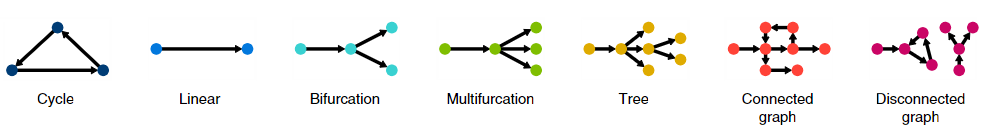  
[Saelens, et al. 2019](https://doi.org/10.1038/s41587-019-0071-9)
<HR>

## Choosing the 'Right' Tool
There are currently over 120 cataloged computational tools for performing trajectory inference [scRNA-tools.org - Ordering Tools (2021)](https://www.scrna-tools.org/analysis). 
It is important to find that right tool for your biological questions as not every tool can handle every trajectory situation. The dynverse website maintains a comparison of over 50 of these methods.  

You can see that not every method can tackle each type of inference of trajectory. Some specialize in bifurcations while others can deal with cycling and graph based patterns. It is important to be able to perform several of these techniques especially when you might not know what possible trajectories you are trying to computationally reconstruct. You can visit the benchmarks on the Dynverse website to better understand the metrics used to compare these tools based upon scores of `Accuracy, Scalability, Stability, and Usability`.

General method types:
* Graphbased
* Tree
* Bifurcation
* Multifurcation
* Linear
* Cycling

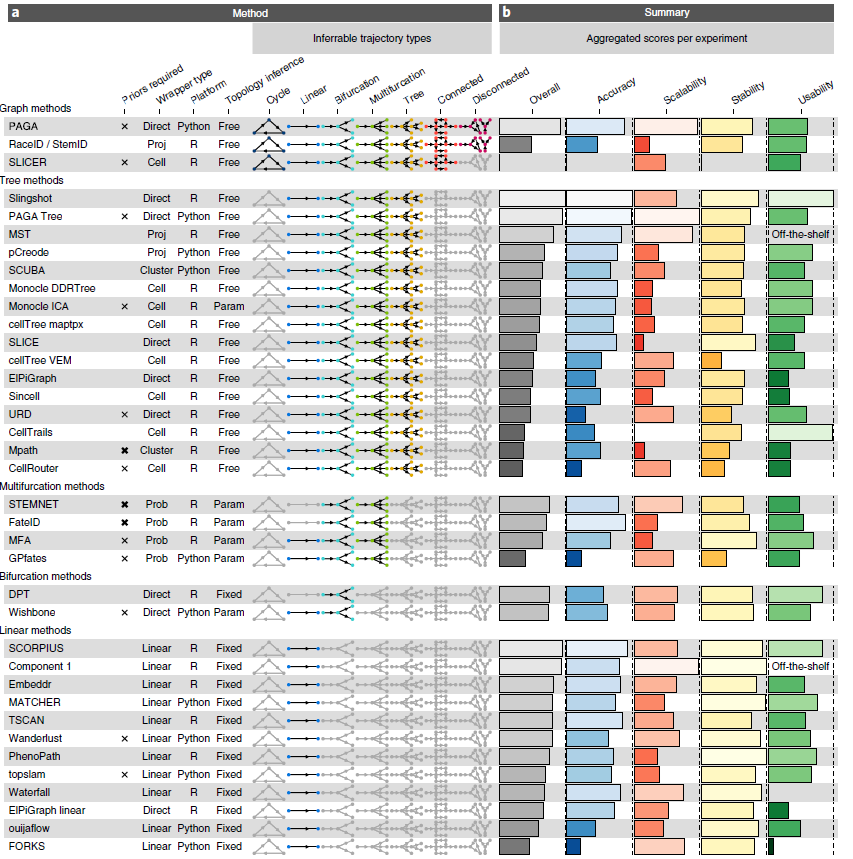  
https://benchmark.dynverse.org 

<HR>

## Other Considerations
Many of these tools expect that you have performed some quality control and/or preliminary analysis prior to loading the data. This can be done using another scRNAseq tool such as Seurat, as we have already seen in the other workshop lectures. Following this initial processing, the resulting Seurat object that you create can be converted to a generic SingleCellExperiment object for importing into many of these tools. See the specific documentation for each tool to see the specific requirements.  

These are the steps/considersations that should be completed before starting to perform a trajectory inference analysis:

* QC
* Dimension reduction (at least PCA, can also potentially use TSNE and UMAP depending on the tool)
* Clustering
* Data in SingleCellExperiment object format

Optional:
* Logic of the biological system and cell types being analyzed
* Naming / Cell type knoweldge of Clusters
* Identification of a Root Starting Cluster and/or End Cluster  

<HR>

## Useful Snippets

### Subseting a Seurat Object  
https://satijalab.org/seurat/articles/essential_commands.html  


`library(Seurat)`  
Based on Idents  
`seurat_subset <- subset(seurat_object, idents = "Progenitors")`  
Subset on the expression level of a gene/feature  
`seurat_subset <- subset(x = seurat_subset, subset = MS4A1 > 3)`   
Downsample the number of cells per identity class  
`seurat_subset <- subset(x = seurat_subset, downsample = 100)`  

### SingleCellExperiment Object
https://bioconductor.org/packages/release/bioc/html/SingleCellExperiment.html  
Defines a class for storing data from single-cell experiments. This includes specialized methods to store and retrieve spike-in information, dimensionality reduction coordinates and size factors for each cell, along with the usual metadata for genes and libraries.

### Convert from Seurat -> SingleCellExperiment
`library(Seurat)`  
`sce <- as.SingleCellExperiment(seurat_subset)`

### Convert from SingleCellExperiment -> Seurat
`library(Seurat)`  
`seurat_subset <- as.Seurat(sce)`

### Convert from Scanpy AnnData -> SingleCellExperiment
https://rdrr.io/github/theislab/zellkonverter/  
  
`library("devtools")`  
`install_github("theislab/zellkonverter")`  
`readH5AD()`  
`AnnData2SCE()` will return a SingleCellExperiment containing the equivalent data from adata.  
`SCE2AnnData()` will return a reticulate reference to an AnnData object containing the content of sce.  
  
https://rdrr.io/github/theislab/zellkonverter/man/AnnData-Conversion.html  
https://satijalab.org/seurat/archive/v2.4/conversion_vignette.html

### Subseting a SingleCellExperiment Object
`library(SingleCellExperiment)`  
`sce_subset <- sce[,grep(pattern = 'Neurogenic Progenitors|Early Photoreceptors|Early Interneurons', sce@colData$ident)]`

### Additional SingleCellExperimentSubsetting  
Take the first 5000 features to reduce processing time  
`sce_subset <- applySCE(sce_subset, FUN=head, n=5000)`  

Could also subset based on specific gene expression levels  
`sce2 <- sce[,which(assay(sce)['ACTB',] > 5000)]`

<HR>

## Example Dataset
#### Human Retinal Organoids
huCRX-GFP organoids grown from iPSCs to study retinal development and cell fate specification.  

* Timepoints: pooled 8, 9, and 10 week organoids
* Enriched for CRX postive photoreceptors by GFP+ flow cytometry
* Sort/Mix Ratio: 40%CRX-GFP(20%hiGFP, 20%lowGFP) + 60% Negative
* Cells captured on 10X Genomics Chromium
* Single Cell Gene Expression Dataset by Cell Ranger 3.0.0  
* 16,845 total cells detected   
* Sequenced on Illumina NovaSeq with approximately 25,000 reads per cell  
    

#### Expected Developmental Lineages
*All cells in the retina are derived from a common progenitor population. 6 neuronal cell types and 1 glial. Also many subtypes within these.*

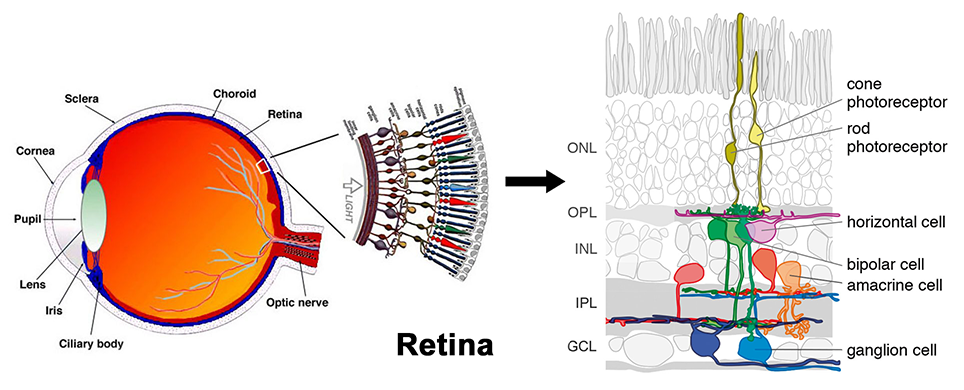  
[Source1](https://webvision.med.utah.edu/book/part-i-foundations/simple-anatomy-of-the-retina/) [Source2](https://www.degruyter.com/document/doi/10.1515/nf-2016-A055/html/)  


*All cell types arrise from the same progenitor pool. Time of progenitor exit from the cell cycle determines cell type. (example in mouse) Ganglion cells die in culture.*  
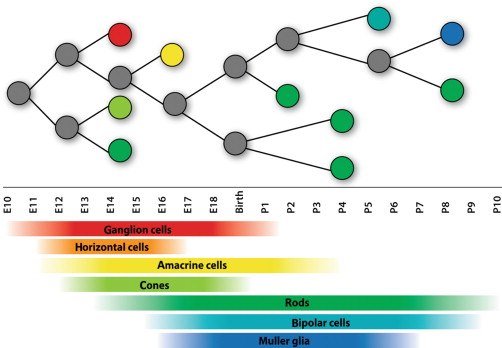  
[Source](https://www.sciencedirect.com/science/article/pii/B9780128000977000075) 

<HR>

## Slingshot
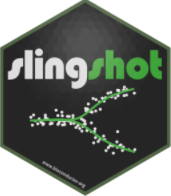  
Slingshot is a tree based method designed for mutiple brancing lineages. Its goal is to be able to identify potentially complex global patterns without being overly sensitive to individual data points. It does not restrict or require previous knowledge of or identification of lineage numbers. Specification of initial and optionally terminal clusters as a form of local supervision. Does not enforce a specific normaliztion, dimensionality reduction, and clustering methods prior to running pseudotime analysis. 

Two main stages of analysis: (inference of global lineage structure and inference of the pseudotime variables for cells along each lineage)
1.  Identification of lineages, i.e., ordered sets of cell clusters, where all lineages share a starting cluster and each leads to a unique terminal cluster. This is achieved by constructing an minimum spanning tree (MST) on clusters of cells.
    * inference of global lineage structure
    * cluster based method MST to identify th ekey elements of the global lineage structure
    * number of lineages and where they 

2.  For each lineage, identification of pseudotimes, i.e., a one-dimensional variable representing each cell’s transcriptional progression toward the terminal state. This is achieved by a method which extends principal curves to the case of multiple branching lineages.

An implementation of the Slingshot algorithm in Python can be found here: https://github.com/mossjacob/pyslingshot

### Get the preprocessed data

In [1]:
#download the dataset
download.file(url = "https://www.dropbox.com/s/it1tv9c7zfzwape/huCRX_GFP_seurat_preprocessing.rds?dl=1", method = "wget", destfile = "huCRX_GFP_seurat_preprocessing.rds" )

In [2]:
# load required libraries and suppress excess messages
suppressMessages(library(Seurat))
suppressMessages(library(slingshot))
suppressMessages(library(ggplot2))

In [3]:
# load saved RDS object
seurat_object <- readRDS("huCRX_GFP_seurat_preprocessing.rds")

# Make sure the active identities are marking the clusters identified in seurat
seurat_object$seurat_clusters <- seurat_object@active.ident

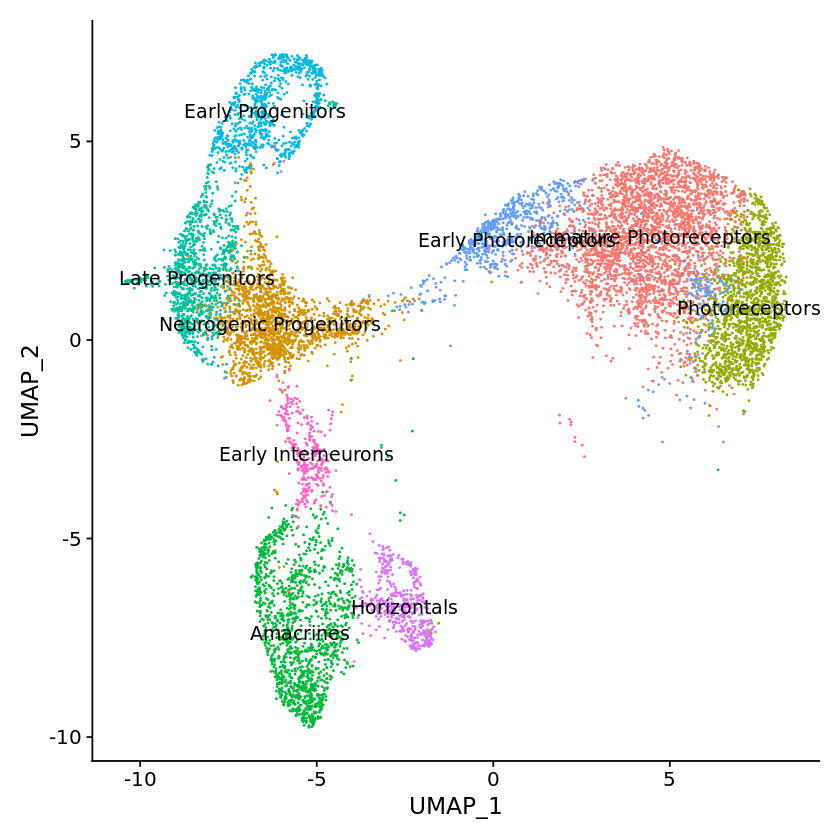

In [4]:
# visualize the data using the precomputed UMAP and clusters from Seurat
DimPlot(seurat_object, label = TRUE) + NoLegend()

### Slingshot Trajectory Analysis

In [5]:
# convert to SingleCellExperiment object (TradeSeq likes SingleCellExperiment)
sce <- as.SingleCellExperiment(seurat_object)

In [6]:
# view the converted object
sce

class: SingleCellExperiment 
dim: 22018 10945 
metadata(0):
assays(2): counts logcounts
rownames(22018): AL627309.1 AL627309.3 ... AC004556.1 AC240274.1
rowData names(0):
colnames(10945): AAACCCAAGGCGTTAG-1 AAACCCAAGTGTACAA-1 ...
  TTTGTTGGTCGTGGTC-2 TTTGTTGTCGAGTGAG-2
colData names(9): orig.ident nCount_RNA ... seurat_clusters ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(1): RNA

In [7]:
# See the labeled identities of the clusters in the data set
table(sce$ident)


Immature Photoreceptors  Neurogenic Progenitors          Photoreceptors 
                   2971                    1605                    1529 
              Amacrines        Late Progenitors       Early Progenitors 
                   1366                    1073                     829 
   Early Photoreceptors             Horizontals      Early Interneurons 
                    778                     472                     322 

#### Predict lineages
You can use slingshot to apply pseudotime across the reduced dimensions calculated in your dataset. This can be any of the types you generated in the preprocessing steps such as PCA, TSNE, or UMAP. The documentation reccomends using PCA as it presurves more of the true global structure than UMAP.

```slinghshot()```  
Perform trajectory inference by (1) identifying lineage structure with a cluster-based minimum spanning tree, and (2) constructing smooth representations of each lineage using simultaneous principal curves. This function wraps the `getLineages` and `getCurves` functions and is the primary function of the slingshot package.  

Arguments:
* data
* clusterLabels
* reducedDim
* start.clus
* end.clus
* allow.breaks

In [8]:
sce <- slingshot(data = sce, clusterLabels = sce$ident, reducedDim = "PCA",
                      allow.breaks = TRUE)

# get the lineages:
lnes <- getLineages(reducedDim(sce,"PCA"), sce$ident)
lnes@metadata$lineages

$Lineage1
[1] "Photoreceptors"          "Immature Photoreceptors"
[3] "Early Photoreceptors"    "Neurogenic Progenitors" 
[5] "Early Interneurons"      "Amacrines"              
[7] "Horizontals"            

$Lineage2
[1] "Photoreceptors"          "Immature Photoreceptors"
[3] "Early Photoreceptors"    "Neurogenic Progenitors" 
[5] "Late Progenitors"        "Early Progenitors"

You can see that the two calculated lineages begin with Photoreceptors. This ordering doesn't quite make biological sense, although the steps occur adjacent to clusters that make sense. While the order technically doesn't matter as long as the path itself does, we can manually define a root starting cluster. This is also why it is good to have done some prelimary work to identify as many of the clusters beforehand to allow for some sanity to be checked.

In [9]:
sce <- slingshot(sce, clusterLabels = sce$ident, reducedDim = "PCA",
                      allow.breaks = TRUE, start.clus="Early Progenitors")
# get the lineages:
lnes <- getLineages(reducedDim(sce,"PCA"),
                    sce$ident, start.clus = "Early Progenitors")

lnes@metadata$lineages

$Lineage1
[1] "Early Progenitors"       "Late Progenitors"       
[3] "Neurogenic Progenitors"  "Early Photoreceptors"   
[5] "Immature Photoreceptors" "Photoreceptors"         

$Lineage2
[1] "Early Progenitors"      "Late Progenitors"       "Neurogenic Progenitors"
[4] "Early Interneurons"     "Amacrines"              "Horizontals"

#### Plot these lineages on the coordinate space.

In [10]:
# this defines the cluster color. You can change it with different color scheme.

#Becky's color variant vision friendly palette
my_color <- c("#68023F","#008169","#EF0096","#00DCB5","#FFCFE2",
           "#003C86","#9400E6","#009FFA","#FF71FD","#7CFFFA",
           "#6A0213","#008607","#F60239","#00E307","#FFDC3D","#ffea8a","#001310","#ffe9f1")

names(my_color) <- unique(as.character(sce$ident))

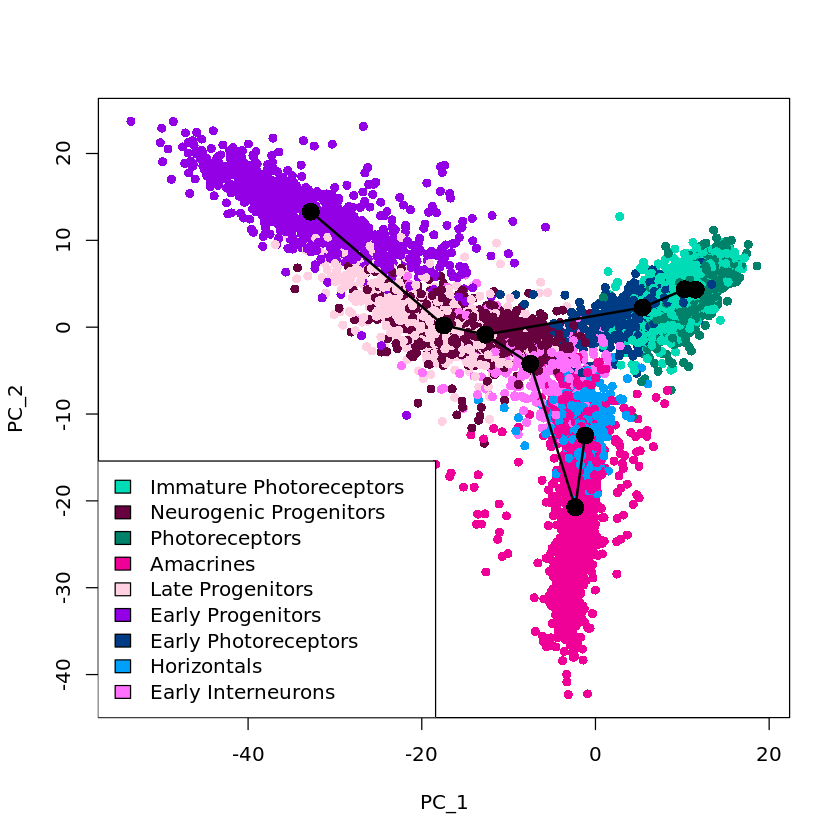

In [11]:
plot(reducedDims(sce)$PCA, col = my_color[as.character(sce$ident)], pch=16, asp = 1)

legend("bottomleft",legend = names(my_color[levels(sce$ident)]),  
       fill = my_color[levels(sce$ident)])

lines(SlingshotDataSet(lnes), lwd=2, type = 'lineages', col = c("black"))

#### Example using UMAP

$Lineage1
[1] "Early Progenitors"       "Late Progenitors"       
[3] "Neurogenic Progenitors"  "Early Photoreceptors"   
[5] "Immature Photoreceptors" "Photoreceptors"         

$Lineage2
[1] "Early Progenitors"      "Late Progenitors"       "Neurogenic Progenitors"
[4] "Early Interneurons"     "Amacrines"              "Horizontals"

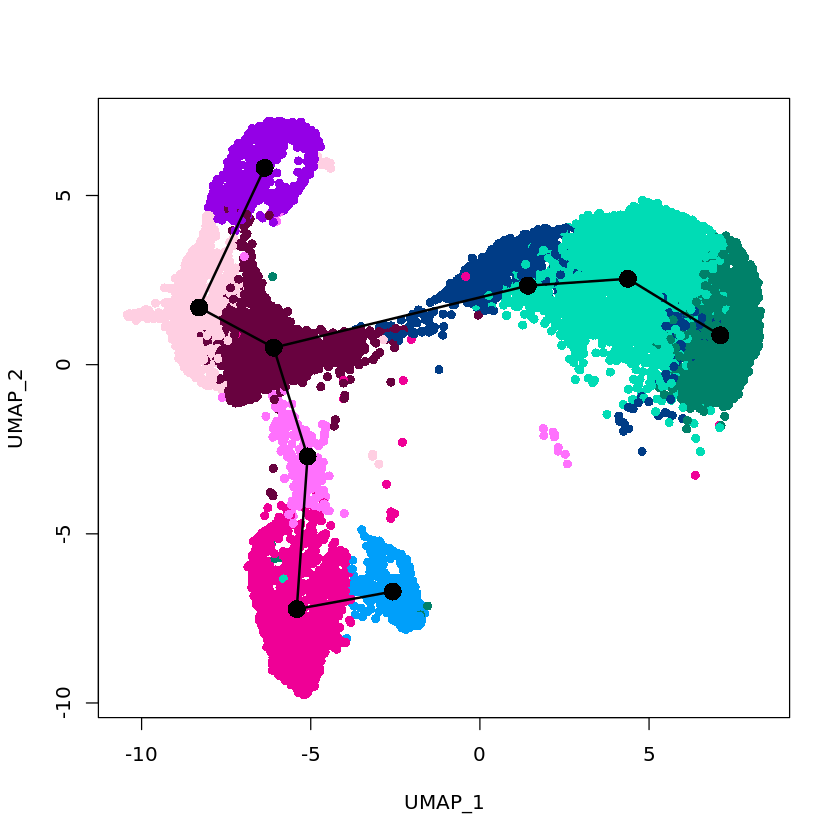

In [12]:
sce_umap <- slingshot(sce, clusterLabels = sce$ident, reducedDim = "UMAP",
                      allow.breaks = TRUE, start.clus="Early Progenitors")
# get the lineages:
lnes_umap <- getLineages(reducedDim(sce_umap,"UMAP"), sce$ident, start.clus="Early Progenitors")
lnes_umap@metadata$lineages

plot(reducedDims(sce_umap)$UMAP, col = my_color[as.character(sce$ident)], 
     pch=16, 
     asp = 1)

lines(SlingshotDataSet(lnes_umap), lwd=2, type = 'lineages', col = c("black"))

### Slingshot Directly with Seurat Object

In [13]:
seurat_object

An object of class Seurat 
45379 features across 10945 samples within 2 assays 
Active assay: SCT (22018 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [14]:
pca_coords <- Embeddings(object = seurat_object, reduction = "pca")[ , 1:15]
clusters <- seurat_object$seurat_clusters

In [15]:
seurat_slingshot <- slingshot(pca_coords, clusterLabels = clusters, reducedDim = "pca",
                      allow.breaks = TRUE, start.clus="Early Progenitors")

In [16]:
seurat_slingshot

class: PseudotimeOrdering 
dim: 10945 2 
metadata(4): lineages mst slingParams curves
pathStats(2): pseudotime weights
cellnames(10945): AAACCCAAGGCGTTAG-1 AAACCCAAGTGTACAA-1 ...
  TTTGTTGGTCGTGGTC-2 TTTGTTGTCGAGTGAG-2
cellData names(2): reducedDim clusterLabels
pathnames(2): Lineage1 Lineage2
pathData names(0):

In [17]:
#map these metadata back onto the seurat object
pseudotime <- data.frame(slingPseudotime(seurat_slingshot))
seurat_object <- AddMetaData(seurat_object, metadata = pseudotime)

In [18]:
seurat_object@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,Lineage1,Lineage2
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>,<dbl>,<dbl>
AAACCCAAGGCGTTAG-1,huCRX_GFP,6002,2100,0.19993336,7332,2102,1,Neurogenic Progenitors,90.86677,88.53862
AAACCCAAGTGTACAA-1,huCRX_GFP,10288,3773,4.38374806,8780,3773,2,Photoreceptors,120.61669,NA
AAACCCACAAGGTTGG-1,huCRX_GFP,14451,4392,0.71967338,8930,4041,4,Amacrines,NA,113.28838
AAACCCAGTCCCGTGA-1,huCRX_GFP,7587,2917,8.51456439,7736,2916,0,Immature Photoreceptors,111.70065,NA
AAACCCAGTCGGCCTA-1,huCRX_GFP,7685,3189,4.51528953,7784,3189,0,Immature Photoreceptors,115.24214,NA
AAACCCAGTGCCCACA-1,huCRX_GFP,8046,3060,2.36142182,8038,3059,1,Neurogenic Progenitors,75.59583,75.63423
AAACCCATCTCTCGCA-1,huCRX_GFP,6220,2658,0.45016077,7206,2659,4,Amacrines,NA,110.32892
AAACGAAAGGGCAAGG-1,huCRX_GFP,6232,3022,0.12836970,7132,3027,6,Late Progenitors,76.80578,77.64470
AAACGAAAGTACAGCG-1,huCRX_GFP,9914,3784,2.69316119,8809,3784,6,Late Progenitors,74.70166,75.01341


#### Plot pseudotime for the lineages across the UMAP

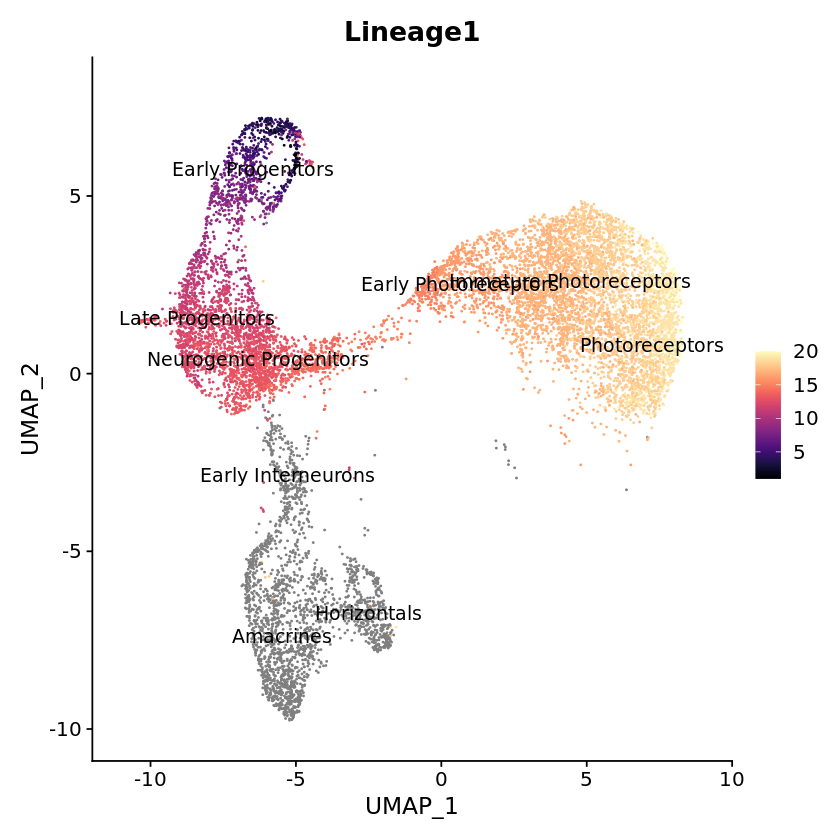

In [19]:
FeaturePlot(seurat_object, label= TRUE, features = "Lineage1", cols = viridis::magma(20))

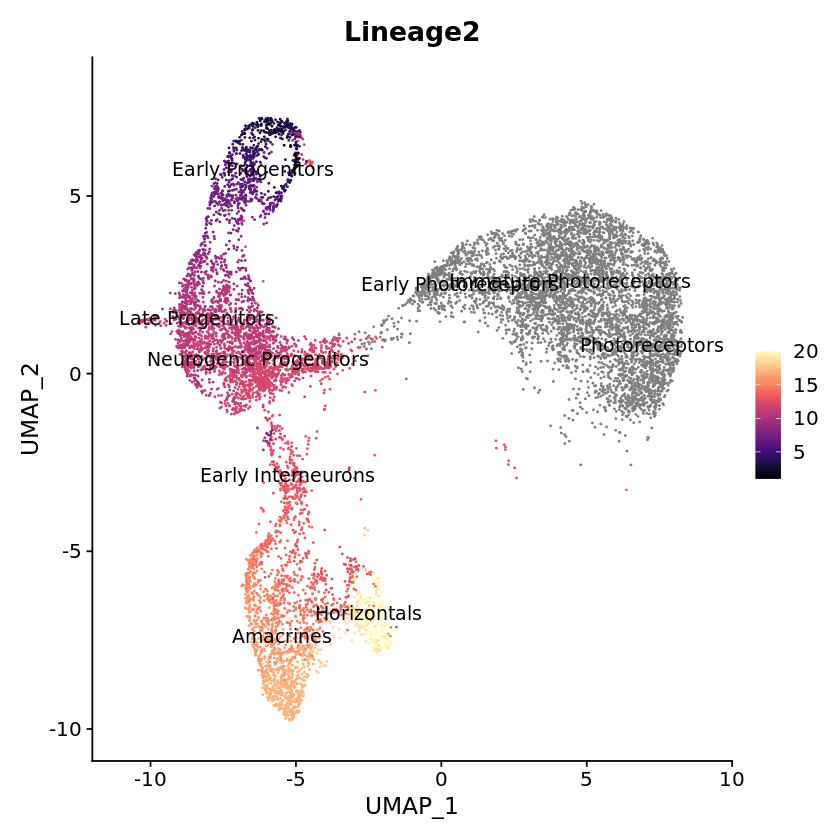

In [20]:
FeaturePlot(seurat_object, label= TRUE, features = "Lineage2", cols = viridis::magma(20))

### Subset the data to include lineages we want to compare with TradeSeq
*Why subset?*  Isolating specific branch points can make analysis easier. Also makes the analysis less computationally intensive.

In [21]:
# Subset Seurat object based on identity class, also see ?SubsetData
seurat_subset <- subset(seurat_object, idents = c("Neurogenic Progenitors", "Early Photoreceptors", "Early Interneurons"))
seurat_subset <- subset(seurat_subset, downsample = 100) #downsamples each cluster to a certain number of cells

In [22]:
seurat_subset

An object of class Seurat 
45379 features across 300 samples within 2 assays 
Active assay: SCT (22018 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

#### TradeSeq expects a SingleCellExperiment Object

In [23]:
# convert to a SingleCellExperiment object
sce_subset <- as.SingleCellExperiment(seurat_subset)

In [24]:
subset_slingshot <- slingshot(sce_subset, clusterLabels = sce_subset$ident, reducedDim = "PCA",
                      allow.breaks = TRUE, start.clus="Neurogenic Progenitors")

In [25]:
subset_slingshot

class: SingleCellExperiment 
dim: 22018 300 
metadata(0):
assays(2): counts logcounts
rownames(22018): AL627309.1 AL627309.3 ... AC004556.1 AC240274.1
rowData names(0):
colnames(300): AAACGCTAGCCGTCGT-1 AACGGGAAGGCATCTT-1 ...
  TTTGACTTCATGGAGG-2 TTTGACTTCCAGTTCC-2
colData names(14): orig.ident nCount_RNA ... slingPseudotime_1
  slingPseudotime_2
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(1): RNA

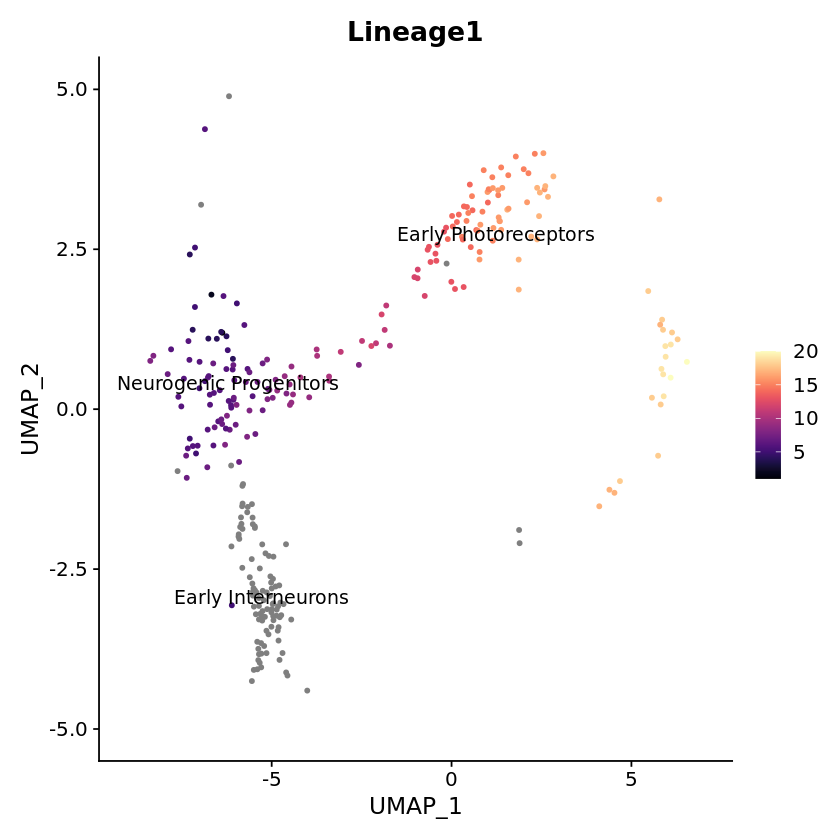

In [26]:
pseudotime <- data.frame(slingPseudotime(subset_slingshot))
seurat_subset <- AddMetaData(seurat_subset, metadata = pseudotime)

FeaturePlot(seurat_subset, label= TRUE, features = "Lineage1", cols = viridis::magma(20))

<HR>

## tradeSeq
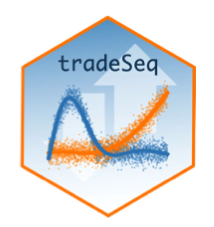  

Trajectory-based differential expression analysis for scRNAseq. A powerful generalized additive model framework based on the negative biomial distrubition that allows flexible inference of both within-lineage and between-lineage differential expression.

### Overview of Functionality

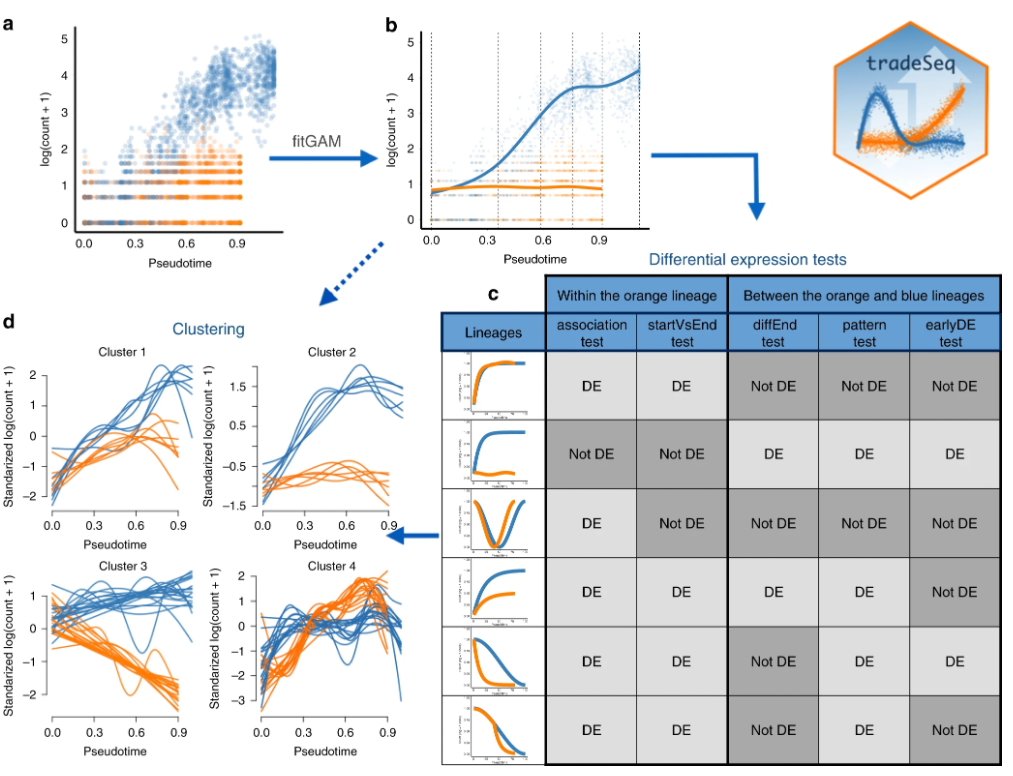

tradeSeq provides a flexible method for fitting regression models that can be used to find genes that are differentially expressed along one or multiple lineages in a trajectory. Based on the fitted models, it uses a variety of tests suited to answer different questions of interest, e.g. the discovery of genes for which expression is associated with pseudotime, or which are differentially expressed (in a specific region) along the trajectory. It fits a negative binomial generalized additive model (GAM) for each gene, and performs inference on the parameters of the GAM.

In [27]:
install.packages("pheatmap") #not in the docker image but we can install it right here!

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [28]:
suppressMessages(library(tradeSeq))
suppressMessages(library(RColorBrewer))
suppressMessages(library(dplyr))
suppressMessages(library(pheatmap))

#### Remember TradeSeq requires SingleCellExperiment format

In [29]:
subset_slingshot

class: SingleCellExperiment 
dim: 22018 300 
metadata(0):
assays(2): counts logcounts
rownames(22018): AL627309.1 AL627309.3 ... AC004556.1 AC240274.1
rowData names(0):
colnames(300): AAACGCTAGCCGTCGT-1 AACGGGAAGGCATCTT-1 ...
  TTTGACTTCATGGAGG-2 TTTGACTTCCAGTTCC-2
colData names(14): orig.ident nCount_RNA ... slingPseudotime_1
  slingPseudotime_2
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(1): RNA

### Identifying temporally dynamic genes
After running slingshot, we are often interested in finding genes that change their expression over the course of development. We will demonstrate this type of analysis using the tradeSeq package (Van den Berge et al. 2020).

For each gene, we will fit a general additive model (GAM) using a negative binomial noise distribution to model the (potentially nonlinear) relationships between gene expression and pseudotime. We will then test for significant associations between expression and pseudotime using the associationTest.

#### Warning: Very processing intensive!

In [30]:
# fit negative binomial GAM
# very memory intensive. If kernel is stopping your are probably running out of RAM

#subset_GAM <- fitGAM(subset_slingshot, verbose = TRUE)
#saveRDS(subset_GAM, file = "subset_GAM.rds")

#### Optional: Parallel Computing (Uses more RAM though)

In [31]:
#BPPARAM <- BiocParallel::bpparam()
#BPPARAM # lists current options
#BPPARAM$workers <- 16 # use X cores
#subset_GAM <- fitGAM(subset_slingshot, verbose = TRUE, parallel=TRUE, BPPARAM = BPPARAM)
#saveRDS(subset_GAM, file = "subset_GAM.rds")

#### Recommended for Workshop: Use Pregenerated Data

In [32]:
# download precomputed GAM
download.file(url = "https://www.dropbox.com/s/rzob69frwkcvboy/subset_GAM.rds?dl=1", method = "wget", destfile = "subset_GAM.rds" )

In [33]:
# load GAM
subset_GAM <- readRDS("subset_GAM.rds")

### Differential Expression Within the Lineages

#### Association Test

A first exploration of the data analysis may consist of checking whether gene expression is associated with a particular lineage. The statistical test performed here, implemented in the `associationTest` function, is testing the null hypothesis that all smoother coefficients are equal to each other. This can be interpreted as testing whether the average gene expression is significantly changing along pseudotime.

WaldStat - In statistics, the Wald test assesses constraints on statistical parameters based on the weighted distance between the unrestricted estimate and its hypothesized value under the null hypothesis, where the weight is the precision of the estimate. Intuitively, the larger this weighted distance, the less likely it is that the constraint is true.

In [34]:
# test for dynamic expression of genes against pseduotime
pseudotime_genes <- associationTest(subset_GAM, lineages = TRUE)
head(pseudotime_genes)

,waldStat,df,pvalue,waldStat_1,df_1,pvalue_1,waldStat_2,df_2,pvalue_2,meanLogFC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL627309.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,3.749920e+00
AL627309.3,NA,NA,NA,5.612743e-18,6,1.000000000,NA,NA,NA,2.239159e-02
AL627309.4,NA,NA,NA,NA,NA,NA,1.3156012,6,0.9707905,1.131556e+01
AL669831.2,NA,NA,NA,5.612743e-18,6,1.000000000,NA,NA,NA,2.239159e-02
AL669831.5,21.66829,12,0.04141004,2.358642e+01,6,0.000622082,0.4532469,6,0.9983618,8.135549e-01
FAM87B,NA,NA,NA,NA,NA,NA,NA,NA,NA,2.368184e+03


In [35]:
# We care about lineage one, so we use pvalue_1 to rank the genes.
topgenes <- rownames(pseudotime_genes[order(pseudotime_genes$pvalue_1), ])[1:100]
topgenes

[1] "STMN1"    "YBX1"     "ATP6V0B"  "PRDX1"    "USP33"    "ZNF326"  
  [7] "RPS27"    "ZNF670"   "ZFP36L2"  "NEUROD1"  "ARF4"     "IMPG2"   
 [13] "SOX2"     "CPE"      "BASP1"    "RPS18"    "PRSS35"   "MARCKS"  
 [19] "MPC1"     "CYCS"     "TMSB4X"   "SSR4"     "CLU"      "SLCO5A1" 
 [25] "MDK"      "CCND1"    "VIM"      "FAM13C"   "DDIT4"    "FAM196A" 
 [31] "PDE6H"    "ZNF385A"  "RPLP0"    "PXMP2"    "TPT1"     "MCF2L"   
 [37] "ZFP36L1"  "CKB"      "RMDN3"    "SCG3"     "CRABP1"   "FAM57B"  
 [43] "TEKT1"    "RCVRN"    "UNC119"   "AP2B1"    "APMAP"    "KIF3B"   
 [49] "RPL18"    "FTL"      "RPS11"    "TTYH1"    "RPS5"     "BAD"     
 [55] "VAMP2"    "SEZ6L2"   "FEZF2"    "ATP6V0E1" "RPS13"    "PPP1R2"  
 [61] "H3F3A"    "NFKBIL1"  "NAP1L1"   "HERPUD1"  "SNAPIN"   "SPTY2D1" 
 [67] "ACTG1"    "CYP26A1"  "HM13"     "EIF1"     "RABL3"    "MAP1LC3B"
 [73] "RPL21"    "SND1"     "ENO1"     "ID4"      "RPL41"    "GPM6A"   
 [79] "SRRM4"    "RPS19"    "CNN3"     "SYP"      "ACTB"     "SELENOW" 
 [85] "RPL26"    "MZT1"     "PBX1"     "FKBP11"   "ENO2"     "SLC25A51"
 [91] "HMGB1"    "AGAP1"    "TFIP11"   "CDH2"     "SOX4"     "MRPL55"  
 [97] "DEK"      "COX6A1"   "MT-CYB"   "TET1"

#### Example Plot heatmap of top differential genes from within Lineage1

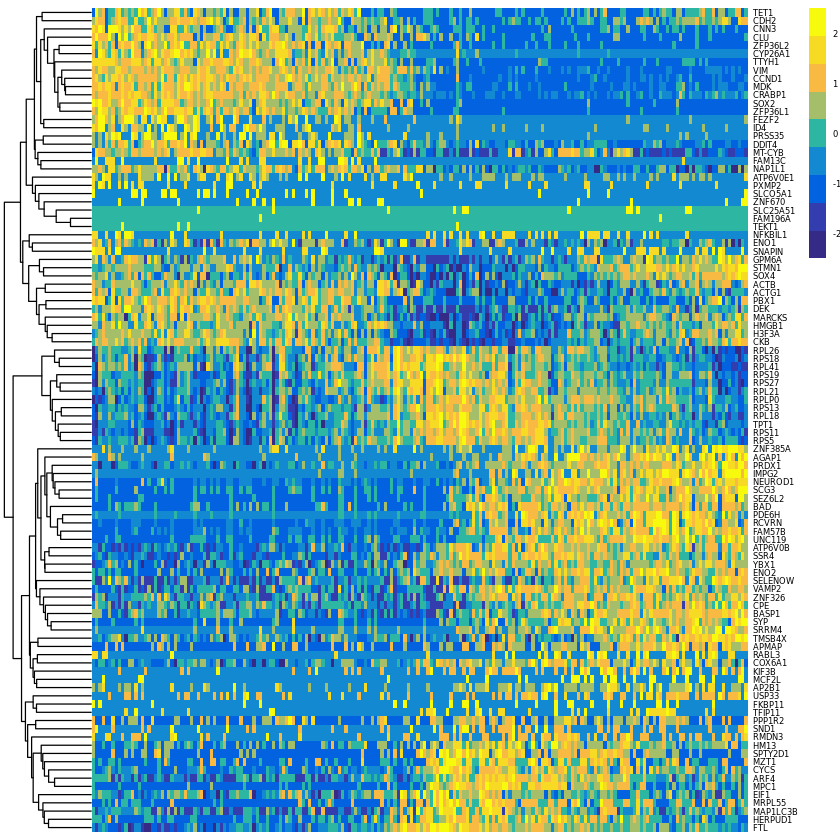

In [36]:
# Get the information for curve 1 so we can find what cells to keep
cell_info <- seurat_subset[["Lineage1"]]

cell_info <- cell_info %>%
  dplyr::filter(!is.na(Lineage1))

# Get the data for all cells
heatdata <- GetAssayData(object = seurat_subset, slot = "data")

# Subset to only genes and cells we want
heatdata <- heatdata[rownames(heatdata) %in% topgenes,
                     colnames(heatdata) %in% rownames(cell_info)]

# Order the data based on the pseudotime ordering of the cells
heatdata <- heatdata[ , order(cell_info$Lineage1)]

## Color the clusters and samples ##
# Set colors
cluster_colors <- RColorBrewer::brewer.pal(8, "Set1")
names(cluster_colors) <- c(0:7)

# We make a list of the colors, make sure the names match the sample info we
# created
color_list <- list(seurat_clusters = cluster_colors)

## Prepare heatmap values ##
# Scale the heatmap values
heatmap_scale <- t(scale(t(as.matrix(heatdata)), scale = TRUE))

# Colors for heatmap (from the ArchR package)
blueYellow <- c("#352A86", "#343DAE", "#0262E0", "#1389D2", "#2DB7A3",
                "#A5BE6A", "#F8BA43", "#F6DA23", "#F8FA0D")

# Add cutoffs for visualization. I actually stole this line of code from the
# Seurat heatmap functions. Without it you can only see some genes
heatmap_scale <- ifelse(heatmap_scale > 2.5, 2.5, heatmap_scale)
heatmap_scale <- ifelse(heatmap_scale < -2.5, -2.5, heatmap_scale)

# Make the heatmap
pheatmap(heatmap_scale, cluster_rows = TRUE,
         cluster_cols = FALSE,
         show_rownames = TRUE,
         show_colnames = FALSE,
         annotation_colors = color_list, color = blueYellow,
         border_color = NA, clustering_method = "complete", fontsize=5) #filename="pheatmap-lineage1.png") # for saving an image file

#### Progenitor Marker Genes
In order to discover marker genes of the progenitor or differentiated cell population, researchers may be interested in assessing differential expression between the progenitor cell population (i.e., the starting point of a lineage) with the differentiated cell type population (i.e., the end point of a lineage). The function `startVsEndTest` uses a Wald test to assess the null hypothesis that the average expression at the starting point of the smoother (progenitor population) is equal to the average expression at the end point of the smoother (differentiated population). The test basically involves a comparison between two smoother coefficients for every lineage. The function `startVsEndTest` performs a global test across all lineages by default (i.e. it compares the start and end positions for all lineages simultaneously), but you can also assess all lineages separately by setting `lineages=TRUE`.

In [37]:
# begining and end of pseudotime differential test
startRes <- startVsEndTest(subset_GAM)

#customRes <- startVsEndTest(sce, pseudotimeValues = c(0.1, 0.8)) # Custom range of pseudotime

In [38]:
# names of the top 25 genes
orderedStart <- order(startRes$waldStat, decreasing = TRUE)
top25 <- head(names(subset_GAM)[orderedStart], n=25)
top25

[1] "HMX1"      "EVA1B"     "CADPS"     "CDCA7L"    "PRSS35"    "ATP1A3"   
 [7] "FZD5"      "COL11A1"   "STMN2"     "THRB"      "COL2A1"    "LINC00461"
[13] "FOXP1"     "FEZF2"     "TTC14"     "EFNB1"     "NES"       "BCL7A"    
[19] "TRH"       "ADARB1"    "RPAIN"     "MEST"      "HAP1"      "UQCR11"   
[25] "MIR503HG"

[1] "HMX1"

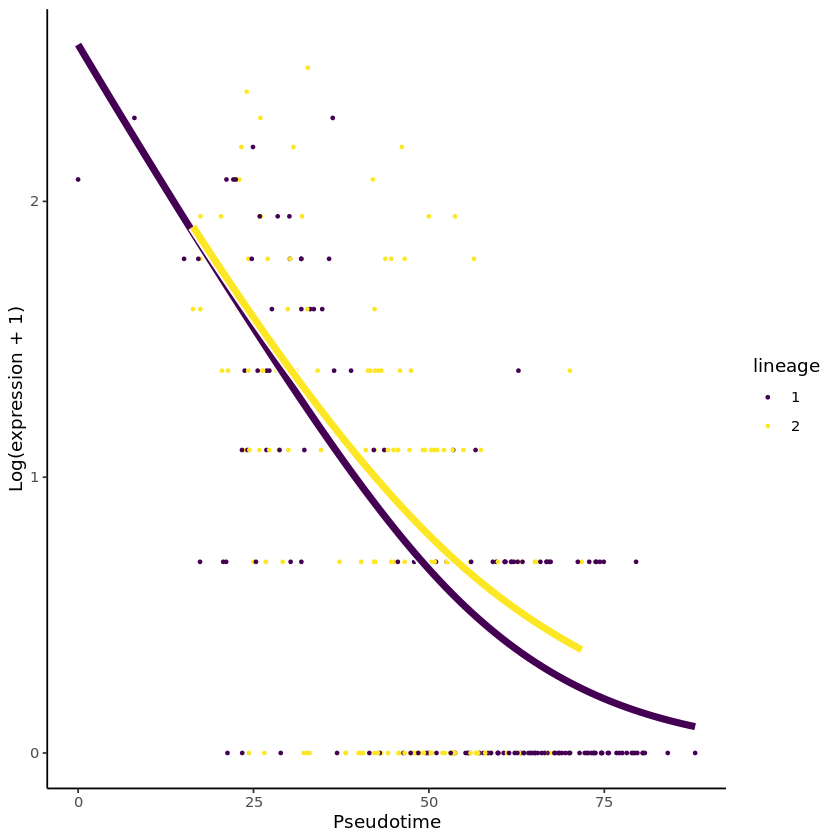

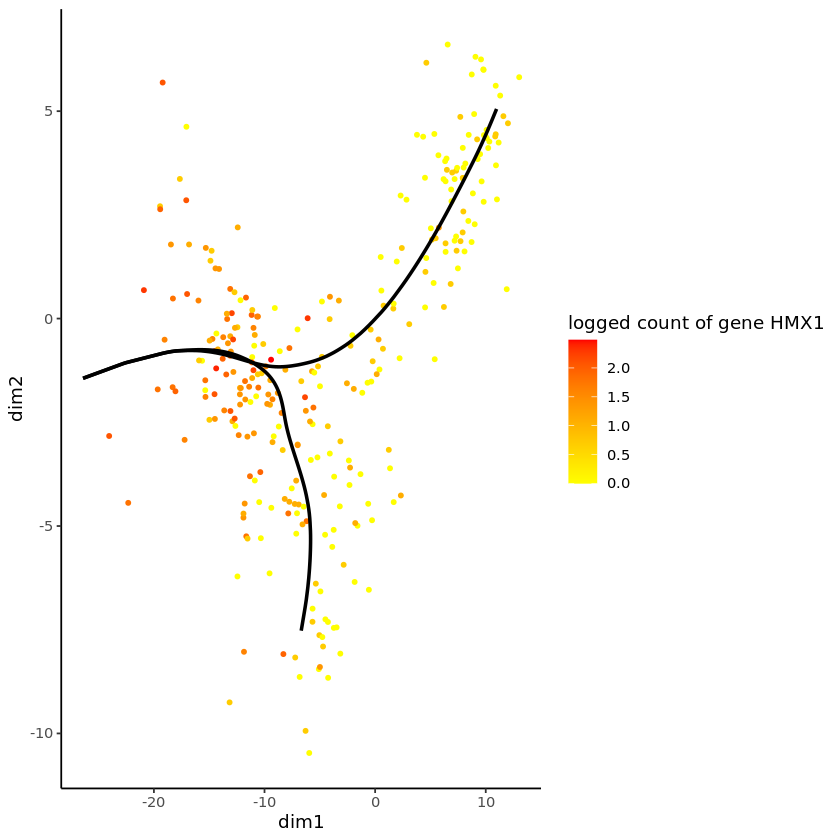

In [39]:
sigGeneStart <- names(subset_GAM)[orderedStart[1]]
#sigGeneStart <- "STMN2"
sigGeneStart

plotSmoothers(subset_GAM, counts(subset_GAM), gene = sigGeneStart)
plotGeneCount(subset_GAM, gene = sigGeneStart)

### Between-lineage comparisons  
#### Discovering differentiated cell type markers
`tradeSeq` can discover marker genes for the differentiated cell types by comparing the average expression between end points of the lineage-specific smoothers. This is implemented in the `diffEndTest` function. By default, `diffEndTest` performs a global test, testing the null hypothesis that the average expression at the endpoints is equal for all lineages using a multivariate Wald test. If more than two lineages are present, one can assess all pairwise comparisons using the `pairwise=TRUE` argument.

In [40]:
# compare ends of lineages to determine differentiation cell type specific genes
endRes <- diffEndTest(subset_GAM)

In [41]:
orderedEnd <- order(endRes$waldStat, decreasing = TRUE)

top25 <- head(names(subset_GAM)[orderedEnd], n=25)
top25

[1] "TRH"        "PRSS23"     "BCL7A"      "NKAIN4"     "SFRP1"     
 [6] "RGS16"      "GOLIM4"     "MT-CO3"     "MT-CYB"     "RBPJ"      
[11] "TPI1"       "AFDN"       "SLCO5A1"    "CARHSP1"    "DSTN"      
[16] "TTC14"      "ATP5MPL"    "GAL"        "SRSF9"      "AKR7A2"    
[21] "MT-CO1"     "CBFA2T2"    "AL139246.5" "CLU"        "PTPRK"

[1] "PDC"

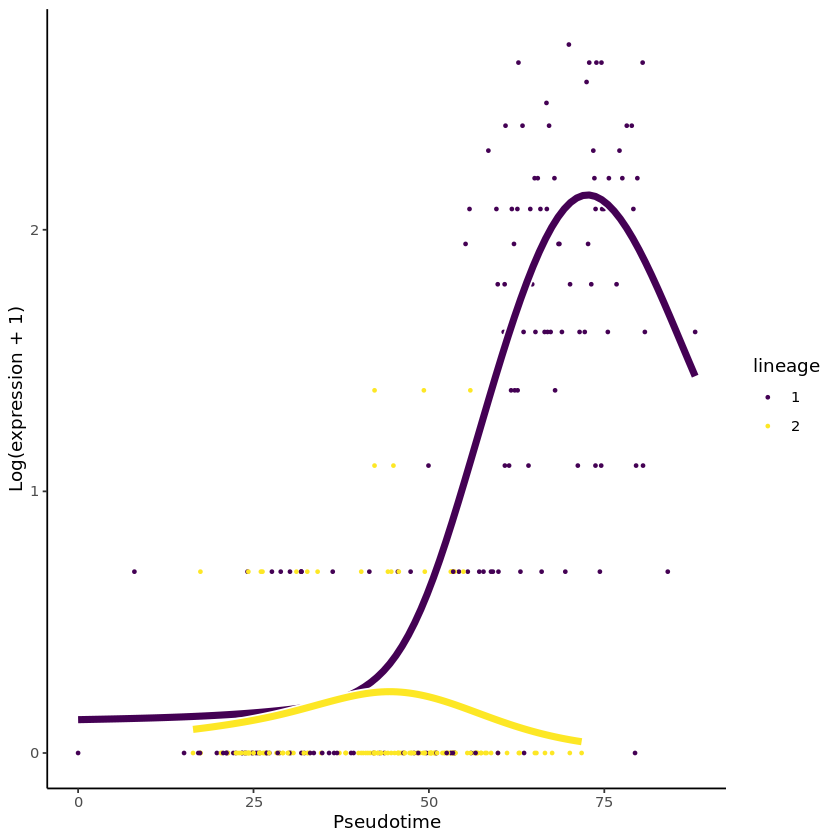

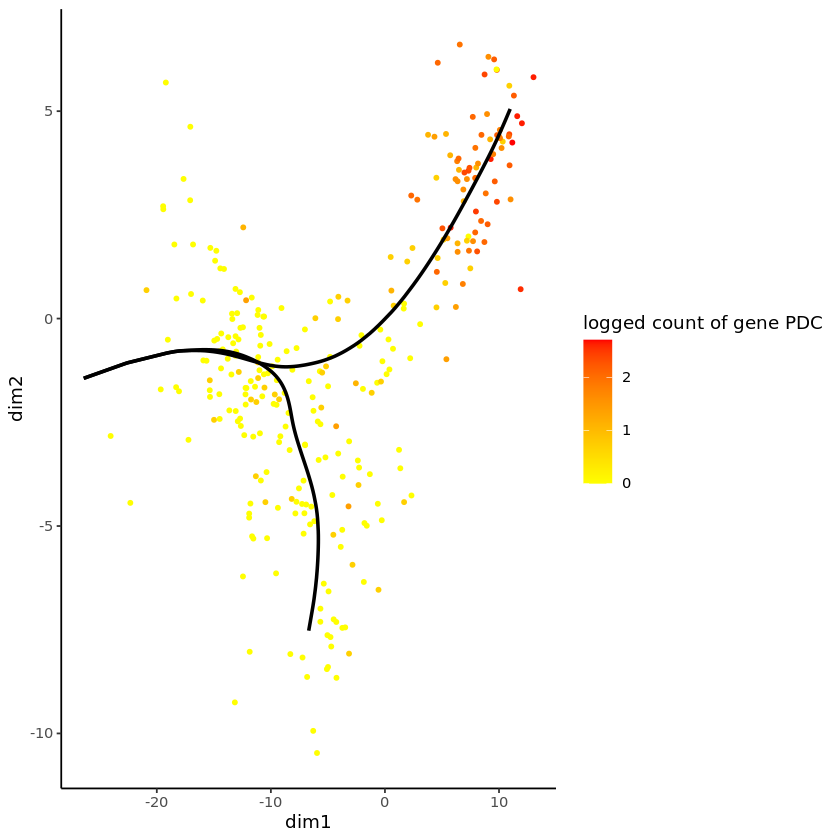

In [42]:
sigGene <- names(subset_GAM)[orderedEnd[1]]
sigGene <- "PDC"
sigGene

plotSmoothers(subset_GAM, counts(subset_GAM), sigGene)
plotGeneCount(subset_GAM, gene = sigGene)

#### Discovering genes with different expression patterns
Asides from testing at the level of the differentiated cell type, researchers may be interested in assessing the expression pattern of a gene over pseudotime. The function `patternTest` implements a statistical method that checks whether the smoothed gene expression is equal along pseudotime between two or multiple lineages. In practice, we use `100 points`, equally distributed along pseudotime, that are compared between two (or multiple) lineages, and this number can be changed using the `nPoints` argument.

In [43]:
# looks for differential patterns between lineages
patternRes <- patternTest(subset_GAM)

In [44]:
orderedPat <- order(patternRes$waldStat, decreasing = TRUE)

top25 <- head(names(subset_GAM)[orderedPat], n=25)
top25

[1] "RBP1"   "CRABP1" "RORB"   "FTL"    "CKB"    "FAU"    "TPT1"   "RPS16" 
 [9] "MDK"    "SOX11"  "RPL18"  "RTN4"   "UQCRH"  "CCND1"  "RPLP0"  "HES6"  
[17] "RPS5"   "MIAT"   "RPL18A" "MARCKS" "RPS13"  "RPS21"  "RPS18"  "MYBL1" 
[25] "H3F3A"

[1] "HES6"

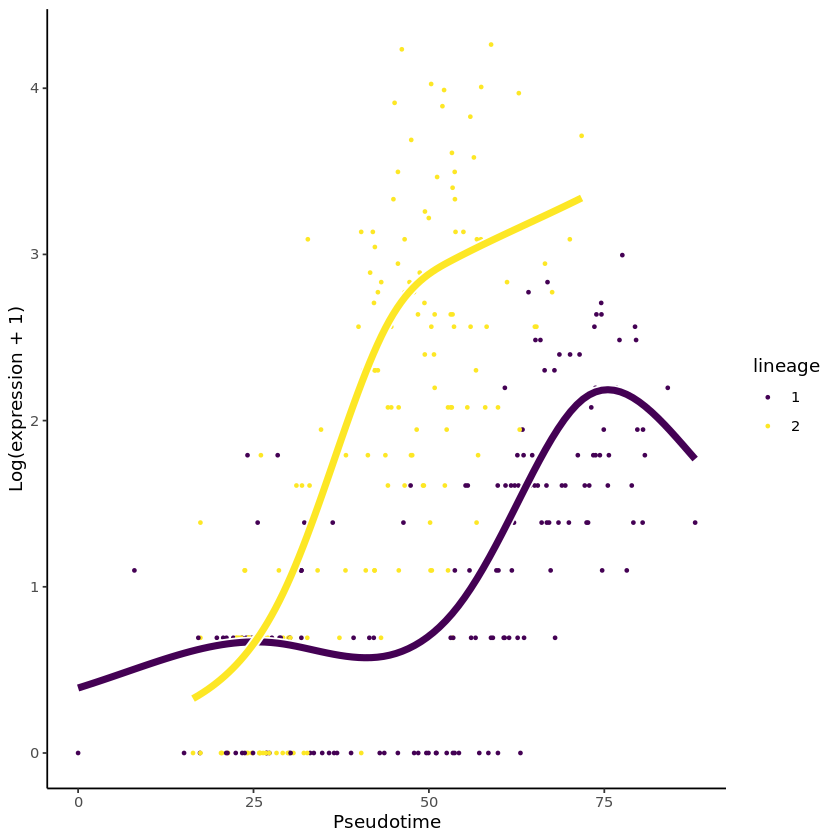

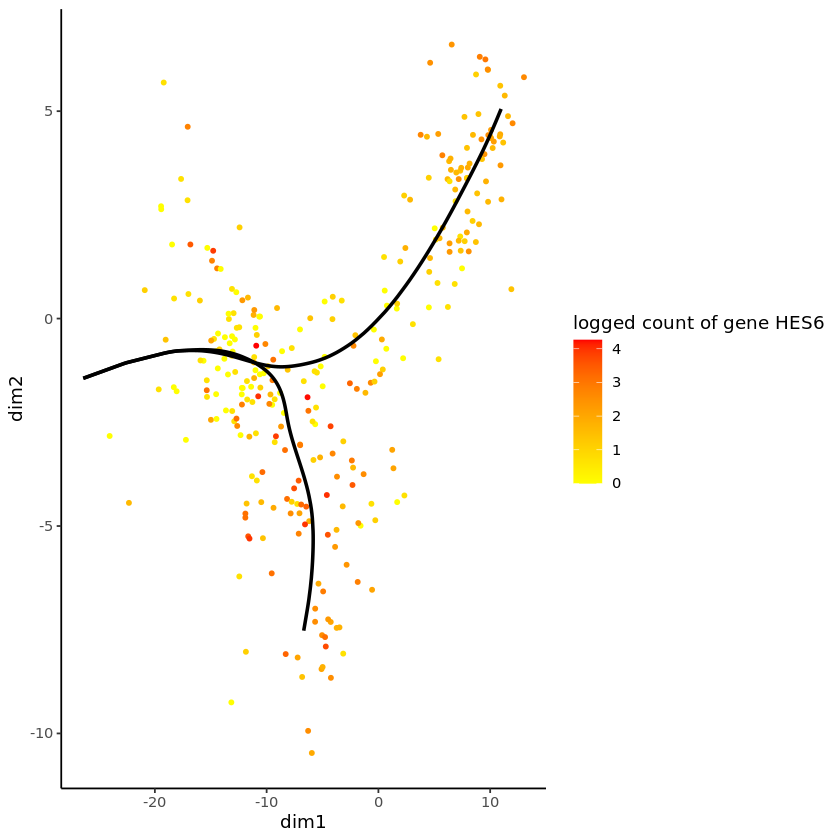

In [45]:
sigGene <- rownames(patternRes)[orderedPat][1]
sigGene <- "HES6"
sigGene

plotSmoothers(subset_GAM, counts(subset_GAM), gene = sigGene)
plotGeneCount(subset_GAM, gene = sigGene)

#### Early Differentially Expressed Genes between Lineages - Early drivers of differentiation

Another question of interest is to find a list of genes that are differentially expressed between lineages at a particular region, e.g. around the separation of two or multiple lineages. The function `earlyDETest` implements a statistical method to test the null hypothesis of whether the average gene expression smoothers are equal between lineages in a region defined by two user-specified knots. Again, the knots can be visualized with the `plotGeneCount` function. By selecting the region covering the first two knot points to test for differential patterns between the lineages, we check which genes are behaving differently around the bifurcation point.

In [46]:
# Identify early differentiated gene expression between lineages
earlyDERes <- earlyDETest(subset_GAM, knots = c(1,2))

In [47]:
orderedEarlyDE <- order(earlyDERes$waldStat, decreasing = TRUE)

top25 <- head(names(subset_GAM)[orderedEarlyDE], n=25)
top25

[1] "TRH"        "PRSS23"     "NKAIN4"     "SFRP1"      "GOLIM4"    
 [6] "DSTN"       "ZBTB16"     "AL139246.5" "CARHSP1"    "RBPJ"      
[11] "AFDN"       "SLCO5A1"    "MZT2B"      "SH3BGRL2"   "PTPRK"     
[16] "FBLN1"      "E2F5"       "CHCHD10"    "RTN3"       "IGFBP5"    
[21] "EPHB2"      "PTTG1IP"    "COL13A1"    "ITGB1"      "MRPS34"

[1] "TRH"

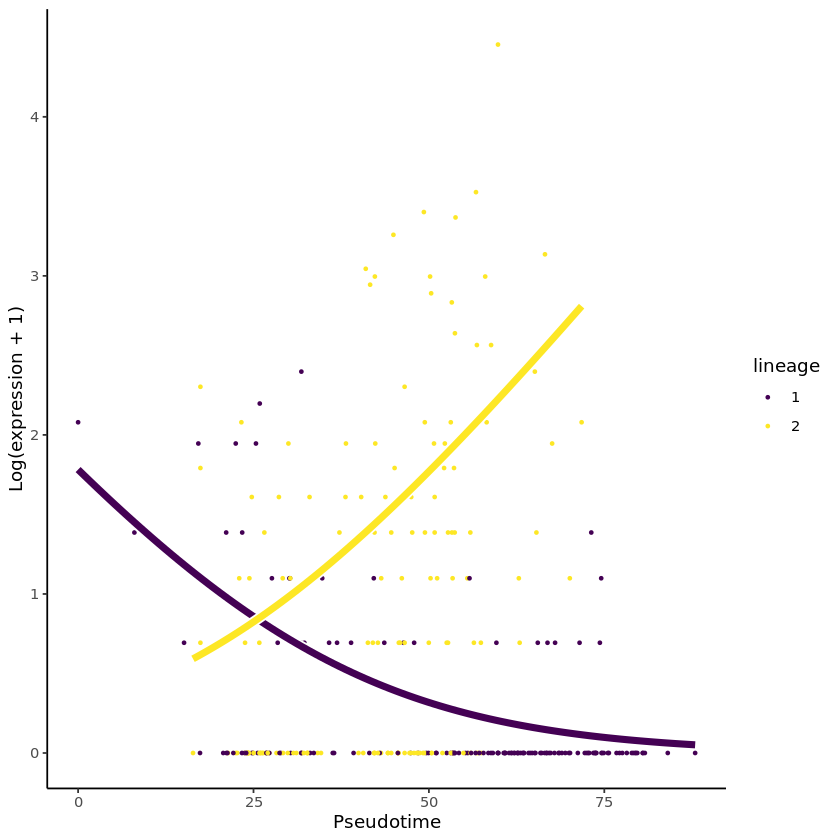

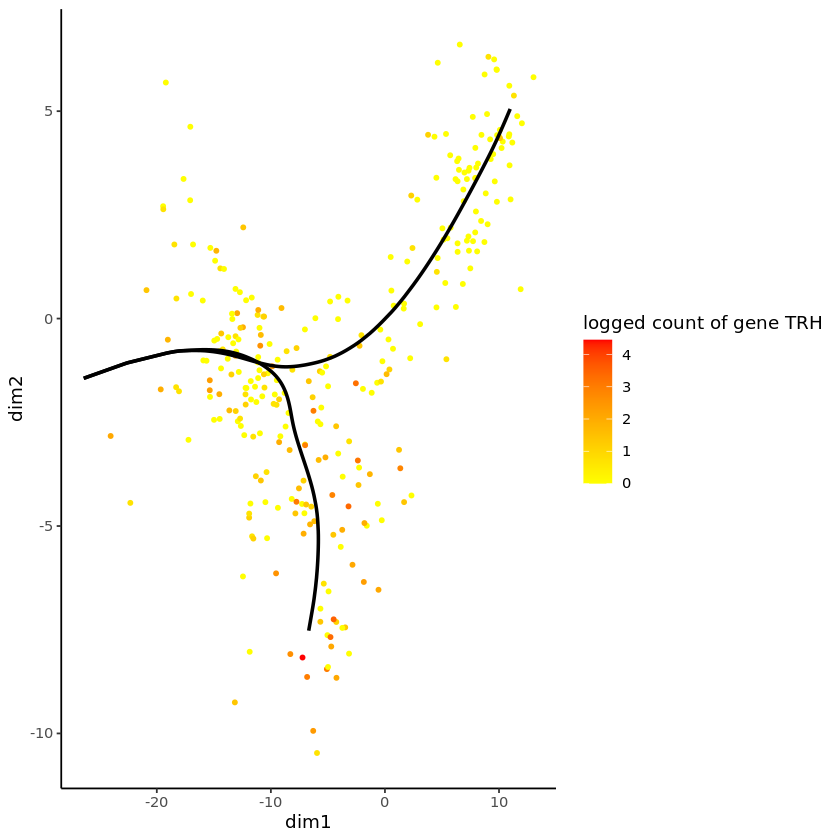

In [48]:
sigGene <- rownames(earlyDERes)[orderedEarlyDE][1]
#sigGene <- "RBPJ"
sigGene

plotSmoothers(subset_GAM, counts(subset_GAM), gene = sigGene)
plotGeneCount(subset_GAM, gene = sigGene)